In [2]:
import os
import numpy as np
import random as rng
import cv2
import json
import math
import pywt
from scipy.misc import face
from scipy.signal.signaltools import wiener

In [3]:
info_data = []
with open('/home/data/strips_socrates/dataset_info.json') as json_file: 
    info_data = json.load(json_file) 

In [4]:
STRIP_SIZE = 256
SUB_STRIP_SIZE = 128
DENOISE_SIGMA = 5

In [5]:
def denoise_coefficient_list(coefficient_list, sigma):
    ll = coefficient_list[0]
    denoised_bands = [ll]
    for band, subband_coefficients in enumerate(coefficient_list[1 :]):
        denoised_bands.append([wiener(s.astype(np.float), sigma)
                               for s in subband_coefficients])
    return denoised_bands


In [6]:
def get_residual(grayscale_matrix):
    dyad_length = math.ceil(math.log(STRIP_SIZE, 2))
    ll_levels = 5
    wavelet_levels = dyad_length - ll_levels
    ll_size = 2 ** ll_levels
    coefficient_list = pywt.wavedec2(grayscale_matrix,
                                       'db8',
                                       level = int(wavelet_levels),
                                       mode = 'per')
    coefficient_list = denoise_coefficient_list(coefficient_list,
                                                  DENOISE_SIGMA)
    denoised_tile = pywt.waverec2(coefficient_list,
                                    'db8',
                                    mode = 'per')
    denoised_tile[denoised_tile > 255.0] = 255.0
    denoised_tile[denoised_tile < 0.0] = 0.0
    return (denoised_tile, grayscale_matrix - denoised_tile)


In [7]:
def get_final(denoised, residual):
    numerator = denoised * residual
    denominator = denoised * denoised
    return(numerator/denominator)

In [8]:
img_path = info_data[6][0][1][0]

In [9]:
img = cv2.imread(img_path)

In [10]:
import matplotlib.pyplot as plt

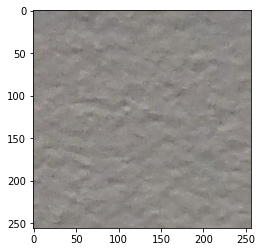

In [11]:
plt.imshow(img)

In [12]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

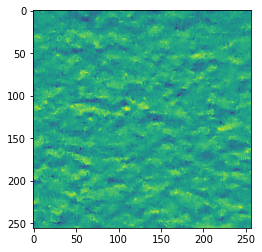

In [13]:
plt.imshow(gray_img)

In [15]:
(denoised, residual) = get_residual(gray_img)

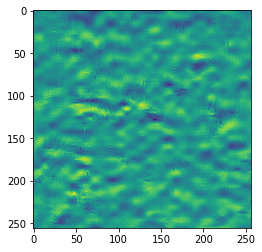

In [16]:
plt.imshow(denoised)

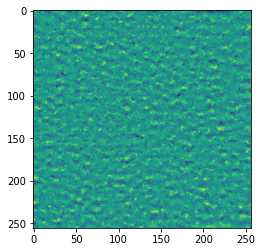

In [17]:
plt.imshow(residual)

In [31]:
final = get_final(denoised, residual)

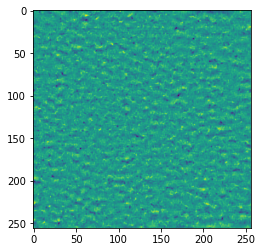

In [35]:
plt.imshow(final)

In [174]:
np.save('testnp', final)

In [163]:
testt = np.load('testnp.npy')

In [168]:
np.amax(testt)

0.03832758080541975

In [162]:
!pwd

/home/projects/studprojskrabec


In [34]:
cv2.normalize(final, final, 0, 256, cv2.NORM_MINMAX)


array([[137.28354989, 145.80993919, 151.20670134, ..., 151.80627574,
        132.88303229, 124.16115211],
       [147.7023977 , 156.59046519, 160.98575469, ..., 141.64651286,
        138.55007245, 130.26717887],
       [142.85266523, 148.80230342, 160.44767766, ..., 145.70854525,
        158.06502192, 140.68596543],
       ...,
       [161.33326775, 141.22581619,  93.9935535 , ..., 165.22364417,
        141.35364509, 133.21539214],
       [159.51839114, 166.05991635, 138.27607239, ..., 182.98984127,
        155.58404306, 134.60409541],
       [152.05690268, 166.20860554, 140.15490191, ..., 178.68064488,
        161.30837141, 139.7960502 ]])

In [21]:
final.astype(int)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [175]:
cv2.imwrite('test.png', final)

True

In [41]:
def get_final_from_path(img_path):
    img = cv2.imread(img_path)
    gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    den, res = get_residual(gimg)
    return (get_final(den, res))

In [209]:
done = []

In [181]:
info_data[0][0][0]

'Eurecom_101_picBG_001'

In [42]:
done = []
def transform_dataset():
    stds = len(info_data)
    for i, std in enumerate(info_data):
        print(i, " of ", stds)
        for img in std:
            for strip in img[1]:
                fin = get_final_from_path(strip)
                cv2.normalize(fin, fin, 0, 256, cv2.NORM_MINMAX)
                fin = fin.astype(int)
                cv2.imwrite(strip, fin)

                
            

In [43]:
transform_dataset()

0  of  96


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/scipy/signal/signaltools.py:1475: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)
/usr/local/lib/python3.6/dist-packages/scipy/signal/signaltools.py:1475: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


1  of  96
2  of  96
3  of  96
4  of  96
5  of  96
6  of  96
7  of  96
8  of  96
9  of  96
10  of  96
11  of  96
12  of  96
13  of  96
14  of  96
15  of  96
16  of  96
17  of  96
18  of  96
19  of  96
20  of  96
21  of  96
22  of  96
23  of  96
24  of  96
25  of  96
26  of  96
27  of  96
28  of  96
29  of  96
30  of  96
31  of  96
32  of  96
33  of  96
34  of  96
35  of  96
36  of  96
37  of  96
38  of  96
39  of  96
40  of  96
41  of  96
42  of  96
43  of  96
44  of  96
45  of  96
46  of  96
47  of  96
48  of  96
49  of  96
50  of  96
51  of  96
52  of  96
53  of  96
54  of  96
55  of  96
56  of  96
57  of  96
58  of  96
59  of  96
60  of  96
61  of  96
62  of  96
63  of  96
64  of  96
65  of  96
66  of  96
67  of  96
68  of  96
69  of  96
70  of  96
71  of  96
72  of  96
73  of  96
74  of  96
75  of  96
76  of  96
77  of  96
78  of  96
79  of  96
80  of  96
81  of  96
82  of  96
83  of  96
84  of  96
85  of  96
86  of  96
87  of  96
88  of  96
89  of  96
90  of  96
91  of  96
92  of  

In [206]:
len(transformed)

1

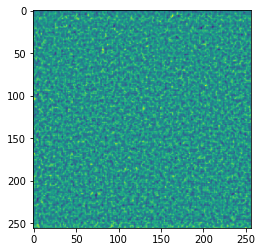

In [207]:
for im in transformed:
    plt.figure()
    plt.imshow(im)

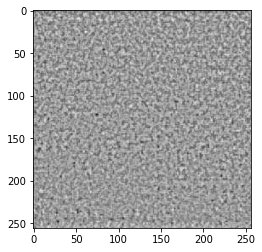

In [214]:
im = cv2.imread('/home/data/strips_socrates/101/Eurecom_101_picBG_001_0_0.PNG')
im2 = cv2.imread('/home/data/strips_socrates/101/Eurecom_101_picBG_001_0_1024.PNG')
plt.imshow(im)

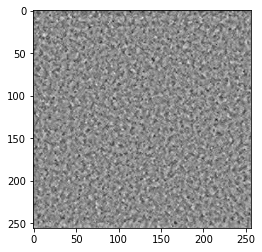

In [190]:
plt.imshow(im2)

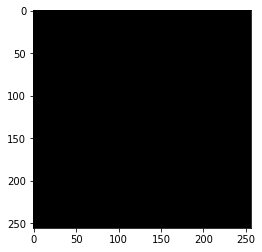

In [191]:

plt.imshow(im2-im)